<a href="https://colab.research.google.com/github/s-choung/Simulation_tutorials/blob/main/handson11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install tqdm

In [2]:
!apt-get update
!sudo apt-get install povray
!pip install -q --upgrade pip
!pip install -q 'numpy>=1.25.0,<2.0.0'
!pip install -q mace-torch
!pip install -q mp_api
!pip install -q chgnet
!pip install -q pymatgen ase

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,734 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,512 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/un

# CatBench

In [3]:
!pip install catbench==0.1.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 132.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [4]:
calc_num = 1
MLP_models = ["CHGNet", "MACE"]

In [5]:
from chgnet.model.dynamics import CHGNetCalculator
from mace.calculators import mace_mp
import catbench

benchmark = 'BalzarettiDensity2024'

catbench.json2pkl(benchmark)

for MLP_model in MLP_models:
    calculators = []
    print("Calculators Initializing...")
    for i in range(calc_num):
        print(f"{i}th calculator")
        if MLP_model == "CHGNet":
            calc = CHGNetCalculator()
        elif MLP_model == "MACE":
            calc = mace_mp(model="large", dispersion=False, default_dtype="float32", device='cuda')

        calculators.append(calc)
    config = {
        "NNP_name": MLP_model,
        "benchmark": benchmark,
        "rate": 0,
        "gas_distance": 30,
        "N_CRIT_RELAX": 100,
    }

    catbench.execute_benchmark(calculators, **config)

/usr/local/lib/python3.10/dist-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.d

True YXJyYXljb25uZWN0aW9uOjM5 40 69
False YXJyYXljb25uZWN0aW9uOjY4 80 69
69/69 data construction complete!
Calculators Initializing...
0th calculator
CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cuda
Starting CHGNet Benchmarking
Starting calculations...
[1/69] Re16_0.5N2(g) + * -> N*
N2gas_0th calculating
[2/69] Re16_H2O(g) - H2(g) + * -> O*
H2Ogas_0th calculating
H2gas_0th calculating
[3/69] Re16_0.5H2(g) + * -> H*
[4/69] Cu16_0.5H2(g) + * -> H*
[5/69] Cu16_H2O(g) - H2(g) + * -> O*
[6/69] Cu16_0.5N2(g) + * -> N*
[7/69] Lu16_0.5N2(g) + * -> N*
[8/69] Lu16_H2O(g) - H2(g) + * -> O*
[9/69] Lu16_0.5H2(g) + * -> H*
[10/69] Ir16_0.5H2(g) + * -> H*
[11/69] Ir16_H2O(g) - H2(g) + * -> O*
[12/69] Ir16_0.5N2(g) + * -> N*
[13/69] Ru16_0.5N2(g) + * -> N*
[14/69] Ru16_H2O(g) - H2(g) + * -> O*
[15/69] Ru16_0.5H2(g) + * -> H*
[16/69] Zr16_0.5N2(g) + * -> N*
[17/69] Zr16_H2O(g) - H2(g) + * -> O*
[18/69] Zr16_0.5H2(g) + * -> H*
[19/69] Fe16_H2O(g) - H2(g) + * -> O*
[20/69] Fe16_0

/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.
Starting MACE Benchmarking
Starting calculations...
[1/69] Re16_0.5N2(g) + * -> N*
N2gas_0th calculating
[2/69] Re16_H2O(g) - H2(g) + * -> O*
H2Ogas_0th calculating
H2gas_0th calculating
[3/69] Re16_0.5H2(g) + * -> H*
[4/69] Cu16_0.5H2(g) + * -> H*
[5/69] Cu16_H2O(g) - H2(g) + * -> O*
[6/69] Cu16_0.5N2(g) + * -> N*
[7/69] Lu16_0.5N2(g) + * -> N*
[8/69] Lu16_H2O(g) - H2(g) + * -> O*
[9/69] Lu16_0.5H2(g) + * -> H*
[10/69] Ir16_0.5H2(g) + * -> H*
[11/69] Ir16_H2O(g) - H2(g) + * -> O*
[12/69] Ir16_0.5N2(g) + * -> N*
[13/69] Ru16_0.5N2(g) + * -> N*
[14/69] Ru16_H2O(g) - H2(g) + * -> O*
[15/69] Ru16_0.5H2(g) + * -> H*
[16/69] Zr16_0.5N2(g) + * -> N*
[17/69] Zr16_H2O(g) - H2(g) + * -> O*
[18/69] Zr16_0.5H2(g) + * -> H*
[19/69] Fe16_H2O(g) - H2(g) + * -> O*
[20/69] Fe16_0.5H2(g) + * -> H*
[21/69] Fe16_0.5N2(g) + * -> N*
[22/69] Ag16_0.5H2(g) + * -> H*
[23/69] Ag16_H2O(g) - H2(g) + * -> O*
[24/69] Ag16_0.5N2

In [6]:
config = {
    "specific_color": "purple",
}

catbench.analysis_MLPs(**config)

CHGNet
MACE
Excel file 'content_Benchmarking_Analysis.xlsx' created successfully.


In [7]:
import shutil
from ase.io import write  # Import the write function from ASE
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks
import os

def visual(structure, repeat = (1,1,1), rotation='-75x, -17y, -4z', png_save_path='./'):
    structure = structure.repeat(repeat)
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)
    display(img)

    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'

    os.makedirs(destination, exist_ok=True)

    for file in files:
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))

In [8]:
from copy import deepcopy
from ase.optimize import LBFGS

def energy_cal(calculator, atoms_origin):
    atoms = deepcopy(atoms_origin)
    atoms.calc =calculator
    tags = np.ones(len(atoms))
    atoms.set_tags(tags)

    opt = LBFGS(atoms)
    opt.run(fmax=0.03,steps = 100)

    return atoms.get_potential_energy(), atoms

# MP querying

In [9]:
import locale
def fixed_getpreferredencoding(do_setlocale=True):
    return 'UTF-8'

locale.getpreferredencoding = fixed_getpreferredencoding

from mp_api.client import MPRester    # Materials Project API Client 6
import pandas as pd                   # Data manipulation with DataFrames
import numpy as np                    # Numerical operations
import matplotlib.pyplot as plt       # Plotting

API_KEY = "OVpYKAkxVvnk7vo9XGsoOmR5I01rpvlZ"  # Provide your API Key here

In [10]:
from ase.io import read
from io import StringIO
import random
from itertools import combinations

common_transition_metals = [
    "Fe", "Co", "Ni", "Cu", "Zn",
    "Ru", "Rh", "Pd", "Ag", "Pt",
    "Ir", "Au", "Ti", "V", "Cr",
    "Mn", "Mo", "W", "Re", "Os"
]

metal_combinations = list(combinations(common_transition_metals, 2))

random_combinations = random.sample(metal_combinations, 50)

metal_combinations

[('Fe', 'Co'),
 ('Fe', 'Ni'),
 ('Fe', 'Cu'),
 ('Fe', 'Zn'),
 ('Fe', 'Ru'),
 ('Fe', 'Rh'),
 ('Fe', 'Pd'),
 ('Fe', 'Ag'),
 ('Fe', 'Pt'),
 ('Fe', 'Ir'),
 ('Fe', 'Au'),
 ('Fe', 'Ti'),
 ('Fe', 'V'),
 ('Fe', 'Cr'),
 ('Fe', 'Mn'),
 ('Fe', 'Mo'),
 ('Fe', 'W'),
 ('Fe', 'Re'),
 ('Fe', 'Os'),
 ('Co', 'Ni'),
 ('Co', 'Cu'),
 ('Co', 'Zn'),
 ('Co', 'Ru'),
 ('Co', 'Rh'),
 ('Co', 'Pd'),
 ('Co', 'Ag'),
 ('Co', 'Pt'),
 ('Co', 'Ir'),
 ('Co', 'Au'),
 ('Co', 'Ti'),
 ('Co', 'V'),
 ('Co', 'Cr'),
 ('Co', 'Mn'),
 ('Co', 'Mo'),
 ('Co', 'W'),
 ('Co', 'Re'),
 ('Co', 'Os'),
 ('Ni', 'Cu'),
 ('Ni', 'Zn'),
 ('Ni', 'Ru'),
 ('Ni', 'Rh'),
 ('Ni', 'Pd'),
 ('Ni', 'Ag'),
 ('Ni', 'Pt'),
 ('Ni', 'Ir'),
 ('Ni', 'Au'),
 ('Ni', 'Ti'),
 ('Ni', 'V'),
 ('Ni', 'Cr'),
 ('Ni', 'Mn'),
 ('Ni', 'Mo'),
 ('Ni', 'W'),
 ('Ni', 'Re'),
 ('Ni', 'Os'),
 ('Cu', 'Zn'),
 ('Cu', 'Ru'),
 ('Cu', 'Rh'),
 ('Cu', 'Pd'),
 ('Cu', 'Ag'),
 ('Cu', 'Pt'),
 ('Cu', 'Ir'),
 ('Cu', 'Au'),
 ('Cu', 'Ti'),
 ('Cu', 'V'),
 ('Cu', 'Cr'),
 ('Cu', 'Mn'),
 ('Cu', 'Mo'),
 (

Processing system: Fe-Zn


Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

No materials found for Fe-Zn with energy_above_hull < 0.2
Processing system: Ru-Ir


Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

No materials found for Ru-Ir with energy_above_hull < 0.2
Processing system: Pd-Ag


Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

No materials found for Pd-Ag with energy_above_hull < 0.2
Processing system: Ni-Ir


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

No materials found for Ni-Ir with energy_above_hull < 0.2
Processing system: Zn-Cr


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Zn3Cr


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

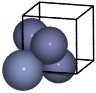

Processing system: Fe-Ru


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

No materials found for Fe-Ru with energy_above_hull < 0.2
Processing system: Ru-Os


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

No materials found for Ru-Os with energy_above_hull < 0.2
Processing system: Rh-Pd


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

No materials found for Rh-Pd with energy_above_hull < 0.2
Processing system: Ag-Cr


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

No materials found for Ag-Cr with energy_above_hull < 0.2
Processing system: Rh-Pt


Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Pt3Rh


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

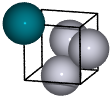

PtRh3


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

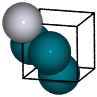

In [11]:
bulk_list = []
bulk_names = []

with MPRester(API_KEY, use_document_model=False) as mpr:
    for metal1, metal2 in random_combinations:
      chemsys = f"{metal1}-{metal2}"
      print(f"Processing system: {chemsys}")

      docs = mpr.materials.summary.search(
          chemsys=chemsys,
          fields=["material_id", "formula_pretty", "energy_above_hull", "symmetry"]
      )
      low_energy_materials = [
          doc for doc in docs
          if doc["energy_above_hull"] < 0.2 and doc["symmetry"]["crystal_system"] == "Cubic" and doc["symmetry"]["number"] == 221
      ]
      ## only cubic structure is taken for handson. remove the 'if statement' above if you want to apply this code.
      if not low_energy_materials:
            print(f"No materials found for {chemsys} with energy_above_hull < 0.2")
            continue

      for material in low_energy_materials:
          material_id = material["material_id"]
          formula = material["formula_pretty"]
          print(formula)
          bulk_names.append(formula)

          structure = mpr.get_structure_by_material_id(material_id)

          cif_string = structure.to(fmt="cif")
          cif_stream = StringIO(cif_string)
          atoms = read(cif_stream, format="cif")
          bulk_list.append(atoms)

          visual(atoms)

# Screening

In [12]:
from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.surface import SlabGenerator
from ase import Atoms

In [13]:
def slab_generator(bulk, miller_index = (1,0,0)):
    adaptor = AseAtomsAdaptor()
    structure = adaptor.get_structure(bulk)

    min_slab_size = 10.0
    min_vacuum_size = 15.0

    slabgen = SlabGenerator(
        initial_structure=structure,
        miller_index=miller_index,
        min_slab_size=min_slab_size,
        min_vacuum_size=min_vacuum_size,
        center_slab=False,
    )

    slabs = slabgen.get_slabs()

    slab_list = []

    if slabs:
        for i, slab in enumerate(slabs):
            ase_slab = adaptor.get_atoms(slab)
            slab_list.append(ase_slab)
    else:
        print("No slabs generated.")

    return slab_list

In [14]:
final_slab_list = []

for bulk in bulk_list:
   slab_list = slab_generator(bulk)
   for slab in slab_list:
      final_slab_list.append(slab)

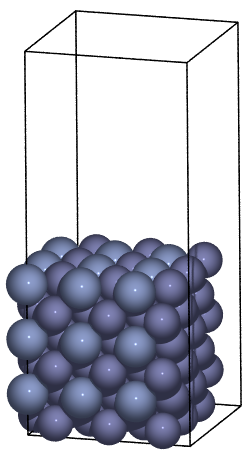

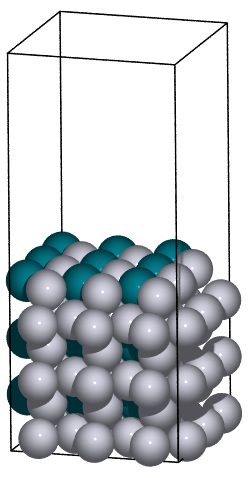

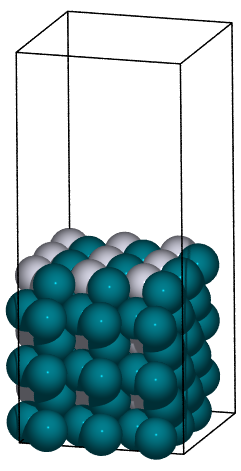

In [15]:
for slab in final_slab_list:
   visual(slab, (3,3,1))

In [16]:
print(len(final_slab_list))

3


In [17]:
from pymatgen.analysis.local_env import VoronoiNN
from pymatgen.analysis.structure_analyzer import SpacegroupAnalyzer
from pymatgen.core.periodic_table import Element
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.analysis.adsorption import AdsorbateSiteFinder
from ase import Atom
from ase.data import covalent_radii, atomic_numbers
from ase.constraints import FixAtoms

def get_center_of_mass(structure):

    total_mass = 0
    weighted_positions = [0, 0, 0]

    for site in structure:
        mass = sum([element.atomic_mass * amt for element, amt in site.species.items()])
        total_mass += mass
        fractional_coords = structure.lattice.get_fractional_coords(site.coords)
        weighted_positions += fractional_coords * mass

    return weighted_positions / total_mass


def get_surface_sites(structure, cn_tolerance=1.5):

    a = SpacegroupAnalyzer(structure)
    ucell = a.get_symmetrized_structure()
    cn_dict = {}
    v = VoronoiNN()
    unique_indices = [equ[0] for equ in ucell.equivalent_indices]

    for i in unique_indices:
        el = ucell[i].species_string
        if el not in cn_dict:
            cn_dict[el] = []
        cn = float("%.5f" % round(v.get_cn(ucell, i, use_weights=True), 5))
        if cn not in cn_dict[el]:
            cn_dict[el].append(cn)
    center_of_mass = get_center_of_mass(structure)
    top_surface_indices = []
    for i, site in enumerate(structure):
        is_top = site.frac_coords[2] > center_of_mass[2]
        try:
            cn = float("%.5f" % round(v.get_cn(structure, i, use_weights=True), 5))
            min_cn = min(cn_dict[site.species_string])
            # Check if the CN is within the tolerance range below the minimum CN
            if cn < (min_cn + cn_tolerance):
                if is_top:
                    top_surface_indices.append(i)
        except RuntimeError:
            if is_top:
                top_surface_indices.append(i)

    return top_surface_indices

def up_slab(atoms, scale_factor=1.1):
    for atom in atoms:
        if atom.symbol == "H":
            h_pos = atom.position

    pos_arr = []
    for i in [-1, 0, 1]:
        for l in [-1, 0, 1]:
            pos_arr.append(h_pos + i * atoms.cell[0] + l * atoms.cell[1])

    for pos in pos_arr:
        distances = [
            np.linalg.norm(pos - atom.position) for atom in atoms if atom.symbol != "H"
        ]
        covalent_distances = [
            covalent_radii[atom.number] * scale_factor
            for atom in atoms
            if atom.symbol != "H"
        ]

        if not all(
            dist > cov_dist for dist, cov_dist in zip(distances, covalent_distances)
        ):
            return 0

    return 1

def adjust_H_position(atoms, scale_factor=1.0):
    hydrogen_radius = covalent_radii[atomic_numbers["H"]]
    check = 0
    iter = 0
    for atom in atoms:
        if atom.symbol == "H":
            while check < 2:
                h_pos = atom.position
                pos_arr = []
                for i in [-1, 0, 1]:
                    for l in [-1, 0, 1]:
                        pos_arr.append(h_pos + i * atoms.cell[0] + l * atoms.cell[1])

                for pos in pos_arr:
                    distances = [
                        np.linalg.norm(pos - atom.position)
                        for atom in atoms
                        if atom.symbol != "H"
                    ]
                    covalent_distances = [
                        covalent_radii[atom.number] * scale_factor + hydrogen_radius
                        for atom in atoms
                        if atom.symbol != "H"
                    ]

                    if not all(
                        dist > cov_dist
                        for dist, cov_dist in zip(distances, covalent_distances)
                    ):
                        check += 1
                        if check == 1:
                            atom.position[2] += 1
                if check == 0:
                    atom.position[2] -= 1
                    iter += 1
                elif check == 1:
                    atom.position[2] -= 0.1
                if atom.position[2] < 0:
                    raise RuntimeError(
                        "An error occurred: Hydrogen atom position out of bounds"
                    )
                if iter == 0:
                    raise RuntimeError("An error occurred: Too low initial")

    return atoms

def fixatom(atoms):
    z_max = max(atoms.positions[:, 2])
    z_min = min(atoms.positions[:, 2])
    z_target = z_min + 0.5 * (z_max - z_min)
    indices_to_fix = [atom.index for atom in atoms if atom.position[2] < z_target]
    const = FixAtoms(indices=indices_to_fix)
    atoms.set_constraint(const)

    return atoms

def H_adsorption(slab):
    struct = AseAtomsAdaptor.get_structure(slab)
    sites = AdsorbateSiteFinder(struct)

    top_surface_indices = get_surface_sites(struct)
    site_properties = {"surface_properties": ["subsurface"] * len(struct)}

    for idx in top_surface_indices:
        site_properties["surface_properties"][idx] = "surface"

    struct = struct.copy(site_properties=site_properties)
    asf = AdsorbateSiteFinder(struct)
    all_sites = asf.find_adsorption_sites(distance=0)["all"]

    H_slabs = []

    for site in all_sites:
        new_slab = slab.copy()
        site += [0, 0, 5]
        new_slab.append(Atom('H', position=site))
        adjust_H_position(new_slab)
        H_slabs.append(fixatom(new_slab))

    return H_slabs

In [18]:
H_first_slabs = H_adsorption(final_slab_list[0])

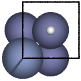

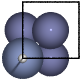

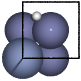

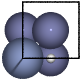

In [19]:
for H_slab in H_first_slabs:
    visual(H_slab, (1,1,1), '0x, 0y, 0z')

Using Materials Project MACE for MACECalculator with /root/.cache/mace/MACE_MPtrj_20229model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 23:39:29       -6.622739        0.357360
LBFGS:    1 23:39:29       -6.624632        0.017770
================== 1 / 3th catalyst =================
       Step     Time          Energy          fmax
LBFGS:    0 23:39:33      -37.600857        0.483816
LBFGS:    1 23:39:33      -37.605228        0.467842
LBFGS:    2 23:39:33      -37.672844        0.128296
LBFGS:    3 23:39:33      -37.676998        0.146457
LBFGS:    4 23:39:33      -37.681625        0.159272
LBFGS:    5 23:39:33      -37.687233        0.127239
LBFGS:    6 23:39:34      -37.692883        0.142941
LBFGS:    7 23:39:34      -37.695984        0.137597
LBFGS:    8 23:39:34      -37.697296        0.117723
LBFGS:    9 23:39:34      -37.698467        0.111145
LBFGS:   10 23:39:34      -37.700668        0.118534
LBFGS:   11 23:39:34      -37.703480        0.098424
LBFGS:   12 23

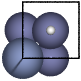

       Step     Time          Energy          fmax
LBFGS:    0 23:39:35      -40.497898        0.830917
LBFGS:    1 23:39:35      -40.507389        0.599848
LBFGS:    2 23:39:35      -40.517445        0.364992
LBFGS:    3 23:39:35      -40.520584        0.444474
LBFGS:    4 23:39:35      -40.537235        0.658336
LBFGS:    5 23:39:35      -40.554661        0.680504
LBFGS:    6 23:39:35      -40.572037        0.498449
LBFGS:    7 23:39:35      -40.582821        0.206236
LBFGS:    8 23:39:36      -40.585823        0.198490
LBFGS:    9 23:39:36      -40.587799        0.177699
LBFGS:   10 23:39:36      -40.593578        0.236051
LBFGS:   11 23:39:36      -40.597637        0.190922
LBFGS:   12 23:39:36      -40.599957        0.155813
LBFGS:   13 23:39:36      -40.601273        0.164792
LBFGS:   14 23:39:36      -40.603268        0.161849
LBFGS:   15 23:39:36      -40.606117        0.203043
LBFGS:   16 23:39:36      -40.609200        0.177764
LBFGS:   17 23:39:36      -40.611118        0.12

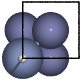

       Step     Time          Energy          fmax
LBFGS:    0 23:39:38      -41.259277        0.421861
LBFGS:    1 23:39:38      -41.261898        0.406665
LBFGS:    2 23:39:38      -41.301338        0.132944
LBFGS:    3 23:39:38      -41.302696        0.135577
LBFGS:    4 23:39:38      -41.303883        0.127374
LBFGS:    5 23:39:38      -41.305866        0.099883
LBFGS:    6 23:39:38      -41.308525        0.085007
LBFGS:    7 23:39:38      -41.310734        0.099119
LBFGS:    8 23:39:38      -41.311752        0.094912
LBFGS:    9 23:39:38      -41.312340        0.081839
LBFGS:   10 23:39:38      -41.313408        0.066546
LBFGS:   11 23:39:38      -41.314838        0.078445
LBFGS:   12 23:39:38      -41.316151        0.086183
LBFGS:   13 23:39:39      -41.316856        0.100430
LBFGS:   14 23:39:39      -41.317322        0.101430
LBFGS:   15 23:39:39      -41.317982        0.092366
LBFGS:   16 23:39:39      -41.319141        0.110631
LBFGS:   17 23:39:39      -41.320766        0.13

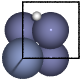

       Step     Time          Energy          fmax
LBFGS:    0 23:39:40      -41.221977        0.751690
LBFGS:    1 23:39:40      -41.235943        0.659871
LBFGS:    2 23:39:40      -41.285660        0.468584
LBFGS:    3 23:39:40      -41.293167        0.468126
LBFGS:    4 23:39:40      -41.335175        0.313125
LBFGS:    5 23:39:40      -41.343227        0.208520
LBFGS:    6 23:39:40      -41.346153        0.152185
LBFGS:    7 23:39:40      -41.348629        0.187304
LBFGS:    8 23:39:40      -41.354141        0.207821
LBFGS:    9 23:39:40      -41.358120        0.149288
LBFGS:   10 23:39:40      -41.360313        0.113198
LBFGS:   11 23:39:40      -41.361691        0.112359
LBFGS:   12 23:39:40      -41.363495        0.171723
LBFGS:   13 23:39:40      -41.366356        0.222887
LBFGS:   14 23:39:40      -41.369904        0.215774
LBFGS:   15 23:39:40      -41.372509        0.140199
LBFGS:   16 23:39:41      -41.373894        0.138762
LBFGS:   17 23:39:41      -41.375118        0.11

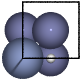

       Step     Time          Energy          fmax
LBFGS:    0 23:39:42      -40.278793        2.536898
LBFGS:    1 23:39:42      -40.425209        1.545016
LBFGS:    2 23:39:42      -40.590290        0.820802
LBFGS:    3 23:39:42      -40.664726        0.489042
LBFGS:    4 23:39:42      -40.707943        0.433225
LBFGS:    5 23:39:42      -40.775013        0.811135
LBFGS:    6 23:39:42      -40.807873        1.076527
LBFGS:    7 23:39:42      -40.836643        0.968809
LBFGS:    8 23:39:42      -40.906788        0.343366
LBFGS:    9 23:39:42      -40.920551        0.369213
LBFGS:   10 23:39:42      -40.932186        0.358243
LBFGS:   11 23:39:42      -40.950142        0.290172
LBFGS:   12 23:39:43      -40.974098        0.269330
LBFGS:   13 23:39:43      -40.991661        0.328146
LBFGS:   14 23:39:43      -41.001415        0.389798
LBFGS:   15 23:39:43      -41.008183        0.378697
LBFGS:   16 23:39:43      -41.018562        0.331176
LBFGS:   17 23:39:43      -41.038410        0.36

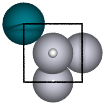

       Step     Time          Energy          fmax
LBFGS:    0 23:39:47      -77.527077        1.275257
LBFGS:    1 23:39:47      -77.554565        0.692936
LBFGS:    2 23:39:48      -77.566971        0.479424
LBFGS:    3 23:39:48      -77.570969        0.361421
LBFGS:    4 23:39:48      -77.582695        0.255453
LBFGS:    5 23:39:48      -77.584389        0.216368
LBFGS:    6 23:39:48      -77.589035        0.249887
LBFGS:    7 23:39:48      -77.592361        0.244507
LBFGS:    8 23:39:48      -77.595413        0.178546
LBFGS:    9 23:39:48      -77.597694        0.160874
LBFGS:   10 23:39:48      -77.600487        0.174324
LBFGS:   11 23:39:48      -77.602875        0.132536
LBFGS:   12 23:39:48      -77.604248        0.086805
LBFGS:   13 23:39:48      -77.604805        0.076853
LBFGS:   14 23:39:49      -77.605148        0.070330
LBFGS:   15 23:39:49      -77.605614        0.058952
LBFGS:   16 23:39:49      -77.606049        0.045180
LBFGS:   17 23:39:49      -77.606232        0.01

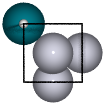

       Step     Time          Energy          fmax
LBFGS:    0 23:39:50      -77.274910        1.523337
LBFGS:    1 23:39:50      -77.327866        1.003681
LBFGS:    2 23:39:50      -77.375633        0.189048
LBFGS:    3 23:39:50      -77.377365        0.170856
LBFGS:    4 23:39:50      -77.389587        0.141472
LBFGS:    5 23:39:50      -77.390388        0.125822
LBFGS:    6 23:39:50      -77.393196        0.160105
LBFGS:    7 23:39:50      -77.393967        0.121496
LBFGS:    8 23:39:51      -77.394836        0.084180
LBFGS:    9 23:39:51      -77.396225        0.119299
LBFGS:   10 23:39:51      -77.397964        0.120917
LBFGS:   11 23:39:51      -77.399139        0.093133
LBFGS:   12 23:39:51      -77.399612        0.066987
LBFGS:   13 23:39:51      -77.399811        0.063975
LBFGS:   14 23:39:51      -77.400002        0.046075
LBFGS:   15 23:39:51      -77.400162        0.029056
================== 3 / 6 th adsorption site ==================


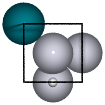

       Step     Time          Energy          fmax
LBFGS:    0 23:39:52      -76.740936        2.764475
LBFGS:    1 23:39:52      -76.906395        1.774731
LBFGS:    2 23:39:52      -77.072037        0.917534
LBFGS:    3 23:39:52      -77.108528        0.685466
LBFGS:    4 23:39:52      -77.139999        0.656811
LBFGS:    5 23:39:52      -77.181305        0.853868
LBFGS:    6 23:39:52      -77.252274        0.891673
LBFGS:    7 23:39:52      -77.296616        0.866247
LBFGS:    8 23:39:52      -77.326973        0.740527
LBFGS:    9 23:39:52      -77.429657        0.580611
LBFGS:   10 23:39:52      -77.455330        0.388279
LBFGS:   11 23:39:53      -77.465645        0.325108
LBFGS:   12 23:39:53      -77.476761        0.181635
LBFGS:   13 23:39:53      -77.478401        0.153388
LBFGS:   14 23:39:53      -77.482849        0.191269
LBFGS:   15 23:39:53      -77.487350        0.196954
LBFGS:   16 23:39:53      -77.491348        0.172413
LBFGS:   17 23:39:53      -77.493286        0.15

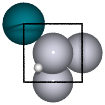

       Step     Time          Energy          fmax
LBFGS:    0 23:39:54      -77.737251        0.775179
LBFGS:    1 23:39:54      -77.752815        0.614050
LBFGS:    2 23:39:54      -77.772240        0.280934
LBFGS:    3 23:39:54      -77.774597        0.276370
LBFGS:    4 23:39:54      -77.785240        0.287580
LBFGS:    5 23:39:54      -77.787979        0.253097
LBFGS:    6 23:39:54      -77.791382        0.204788
LBFGS:    7 23:39:54      -77.795937        0.280035
LBFGS:    8 23:39:54      -77.801292        0.259415
LBFGS:    9 23:39:55      -77.804558        0.154182
LBFGS:   10 23:39:55      -77.806023        0.098527
LBFGS:   11 23:39:55      -77.807037        0.108745
LBFGS:   12 23:39:55      -77.808243        0.122423
LBFGS:   13 23:39:55      -77.809265        0.091674
LBFGS:   14 23:39:55      -77.809761        0.044640
LBFGS:   15 23:39:55      -77.809914        0.033137
LBFGS:   16 23:39:55      -77.809998        0.023228
================== 5 / 6 th adsorption site ====

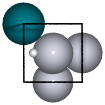

       Step     Time          Energy          fmax
LBFGS:    0 23:39:56      -77.525406        0.364922
LBFGS:    1 23:39:56      -77.528908        0.277571
LBFGS:    2 23:39:56      -77.537910        0.314313
LBFGS:    3 23:39:56      -77.541168        0.335787
LBFGS:    4 23:39:56      -77.553932        0.217904
LBFGS:    5 23:39:56      -77.557014        0.199680
LBFGS:    6 23:39:56      -77.560333        0.184329
LBFGS:    7 23:39:56      -77.563721        0.199427
LBFGS:    8 23:39:56      -77.567184        0.200631
LBFGS:    9 23:39:56      -77.569420        0.126942
LBFGS:   10 23:39:56      -77.570442        0.081906
LBFGS:   11 23:39:56      -77.570808        0.058988
LBFGS:   12 23:39:56      -77.571121        0.065665
LBFGS:   13 23:39:57      -77.571480        0.080329
LBFGS:   14 23:39:57      -77.571930        0.098018
LBFGS:   15 23:39:57      -77.573074        0.175612
LBFGS:   16 23:39:57      -77.564934        1.088332
LBFGS:   17 23:39:57      -77.577164        0.31

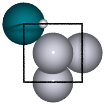

       Step     Time          Energy          fmax
LBFGS:    0 23:40:03      -77.464165        0.604899
LBFGS:    1 23:40:03      -77.474571        0.436436
LBFGS:    2 23:40:03      -77.491066        0.201831
LBFGS:    3 23:40:03      -77.493065        0.205290
LBFGS:    4 23:40:03      -77.506020        0.237961
LBFGS:    5 23:40:03      -77.507812        0.250128
LBFGS:    6 23:40:04      -77.516258        0.245643
LBFGS:    7 23:40:04      -77.519798        0.170737
LBFGS:    8 23:40:04      -77.522499        0.143047
LBFGS:    9 23:40:04      -77.524162        0.120176
LBFGS:   10 23:40:04      -77.525551        0.085510
LBFGS:   11 23:40:04      -77.526306        0.071776
LBFGS:   12 23:40:04      -77.526634        0.060660
LBFGS:   13 23:40:04      -77.526855        0.060771
LBFGS:   14 23:40:04      -77.527222        0.072510
LBFGS:   15 23:40:04      -77.527824        0.096062
LBFGS:   16 23:40:04      -77.528801        0.130945
LBFGS:   17 23:40:04      -77.530769        0.20

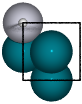

       Step     Time          Energy          fmax
LBFGS:    0 23:40:11      -85.318924        1.363446
LBFGS:    1 23:40:11      -85.347076        0.775821
LBFGS:    2 23:40:11      -85.359055        0.529944
LBFGS:    3 23:40:11      -85.362976        0.397856
LBFGS:    4 23:40:11      -85.378662        0.381682
LBFGS:    5 23:40:11      -85.383980        0.348724
LBFGS:    6 23:40:11      -85.388580        0.351887
LBFGS:    7 23:40:11      -85.394470        0.386534
LBFGS:    8 23:40:12      -85.401840        0.336838
LBFGS:    9 23:40:12      -85.407722        0.215300
LBFGS:   10 23:40:12      -85.410645        0.155787
LBFGS:   11 23:40:12      -85.412476        0.154934
LBFGS:   12 23:40:12      -85.414330        0.153085
LBFGS:   13 23:40:12      -85.416054        0.147403
LBFGS:   14 23:40:12      -85.417206        0.105207
LBFGS:   15 23:40:12      -85.417763        0.096741
LBFGS:   16 23:40:12      -85.418144        0.071284
LBFGS:   17 23:40:12      -85.418526        0.07

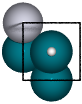

       Step     Time          Energy          fmax
LBFGS:    0 23:40:13      -85.216026        1.426913
LBFGS:    1 23:40:13      -85.260307        0.966989
LBFGS:    2 23:40:13      -85.302299        0.245628
LBFGS:    3 23:40:13      -85.304436        0.235657
LBFGS:    4 23:40:13      -85.327286        0.220058
LBFGS:    5 23:40:13      -85.328354        0.156874
LBFGS:    6 23:40:13      -85.329941        0.218971
LBFGS:    7 23:40:13      -85.332512        0.270403
LBFGS:    8 23:40:13      -85.336464        0.242489
LBFGS:    9 23:40:14      -85.339355        0.130267
LBFGS:   10 23:40:14      -85.340973        0.108816
LBFGS:   11 23:40:14      -85.342003        0.081413
LBFGS:   12 23:40:14      -85.342590        0.054203
LBFGS:   13 23:40:14      -85.342827        0.031902
LBFGS:   14 23:40:14      -85.342880        0.012512
================== 3 / 6 th adsorption site ==================


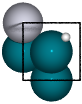

       Step     Time          Energy          fmax
LBFGS:    0 23:40:15      -85.566292        1.044316
LBFGS:    1 23:40:15      -85.591751        0.820263
LBFGS:    2 23:40:15      -85.621094        0.365331
LBFGS:    3 23:40:15      -85.625565        0.379585
LBFGS:    4 23:40:15      -85.642342        0.432326
LBFGS:    5 23:40:15      -85.650024        0.390974
LBFGS:    6 23:40:15      -85.655937        0.290262
LBFGS:    7 23:40:15      -85.661186        0.287292
LBFGS:    8 23:40:16      -85.669273        0.342148
LBFGS:    9 23:40:16      -85.676994        0.261142
LBFGS:   10 23:40:16      -85.681877        0.182866
LBFGS:   11 23:40:16      -85.684227        0.115968
LBFGS:   12 23:40:16      -85.686234        0.159950
LBFGS:   13 23:40:16      -85.688629        0.176722
LBFGS:   14 23:40:16      -85.690369        0.110690
LBFGS:   15 23:40:16      -85.690918        0.042156
LBFGS:   16 23:40:16      -85.691010        0.032867
LBFGS:   17 23:40:16      -85.691048        0.02

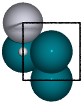

       Step     Time          Energy          fmax
LBFGS:    0 23:40:17      -84.864052        1.726541
LBFGS:    1 23:40:17      -84.936996        1.163685
LBFGS:    2 23:40:17      -85.041534        0.589754
LBFGS:    3 23:40:17      -85.056351        0.461286
LBFGS:    4 23:40:18      -85.070877        0.536777
LBFGS:    5 23:40:18      -85.094070        0.652326
LBFGS:    6 23:40:18      -85.133072        0.565462
LBFGS:    7 23:40:18      -85.189507        0.631053
LBFGS:    8 23:40:18      -85.221245        0.796792
LBFGS:    9 23:40:18      -85.245392        0.732253
LBFGS:   10 23:40:18      -85.363068        0.556647
LBFGS:   11 23:40:18      -85.369896        0.425117
LBFGS:   12 23:40:18      -85.381401        0.200500
LBFGS:   13 23:40:18      -85.384216        0.158683
LBFGS:   14 23:40:18      -85.386551        0.152939
LBFGS:   15 23:40:18      -85.388847        0.091765
LBFGS:   16 23:40:18      -85.389633        0.061762
LBFGS:   17 23:40:18      -85.389786        0.04

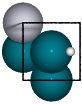

       Step     Time          Energy          fmax
LBFGS:    0 23:40:19      -85.324936        0.514541
LBFGS:    1 23:40:19      -85.332466        0.452333
LBFGS:    2 23:40:19      -85.349571        0.275993
LBFGS:    3 23:40:19      -85.353416        0.302469
LBFGS:    4 23:40:19      -85.371956        0.293263
LBFGS:    5 23:40:19      -85.377136        0.276191
LBFGS:    6 23:40:20      -85.380943        0.310575
LBFGS:    7 23:40:20      -85.384697        0.348680
LBFGS:    8 23:40:20      -85.390686        0.355974
LBFGS:    9 23:40:20      -85.396049        0.269907
LBFGS:   10 23:40:20      -85.399124        0.135021
LBFGS:   11 23:40:20      -85.400085        0.095875
LBFGS:   12 23:40:20      -85.400513        0.074164
LBFGS:   13 23:40:20      -85.400917        0.065224
LBFGS:   14 23:40:20      -85.401115        0.040775
LBFGS:   15 23:40:20      -85.401192        0.029503
================== 6 / 6 th adsorption site ==================


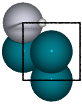

       Step     Time          Energy          fmax
LBFGS:    0 23:40:21      -85.353767        0.380872
LBFGS:    1 23:40:21      -85.357742        0.320954
LBFGS:    2 23:40:21      -85.382278        0.386192
LBFGS:    3 23:40:21      -85.389946        0.353825
LBFGS:    4 23:40:21      -85.402901        0.444608
LBFGS:    5 23:40:21      -85.409576        0.404371
LBFGS:    6 23:40:21      -85.416161        0.274534
LBFGS:    7 23:40:21      -85.420303        0.225681
LBFGS:    8 23:40:21      -85.424477        0.203022
LBFGS:    9 23:40:21      -85.427750        0.131208
LBFGS:   10 23:40:21      -85.429138        0.093992
LBFGS:   11 23:40:22      -85.429665        0.071120
LBFGS:   12 23:40:22      -85.430046        0.060768
LBFGS:   13 23:40:22      -85.430260        0.030757
LBFGS:   14 23:40:22      -85.430344        0.021153


In [20]:
from chgnet.model.dynamics import CHGNetCalculator

MACE_calc = mace_mp(model="large", dispersion=False, default_dtype="float32", device='cuda')

h2 = Atoms('H2', positions=[[0, 0, 0], [0.74, 0, 0]])

h2.set_cell([10, 10, 10])
h2.center()

H2_energy, _ = energy_cal(MACE_calc, h2)

best_energy = []
best_CONTCAR = []

for i, slab_origin in enumerate(final_slab_list):
    print('======================================================')
    print(f'================== {i+1} / {len(final_slab_list)}th catalyst =================')
    print('======================================================')
    lowest_energy = 0
    H_slabs_final = H_adsorption(slab_origin)
    slab_energy, _ = energy_cal(MACE_calc, slab_origin)
    for j, H_adslab in enumerate(H_slabs_final):
        print(f'================== {j+1} / {len(H_slabs_final)} th adsorption site ==================')
        visual(H_adslab, (1,1,1), '0x, 0y, 0z')
        H_adslab_energy, CONTCAR_H_adslab = energy_cal(MACE_calc, H_adslab)
        if H_adslab_energy < lowest_energy:
            lowest_energy = H_adslab_energy
            lowest_CONTCAR = CONTCAR_H_adslab

    H_adsorption_energy = lowest_energy - slab_energy - 0.5 * H2_energy + 0.27

    best_energy.append(H_adsorption_energy)
    best_CONTCAR.append(lowest_CONTCAR)

Zn3Cr
H_ads energy : -0.09231708526611326 eV


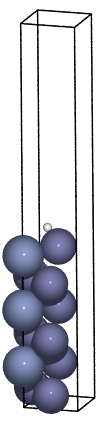

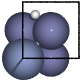

Pt3Rh
H_ads energy : -0.33091495513916014 eV


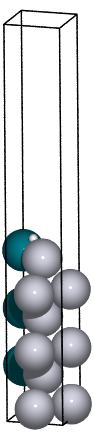

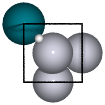

PtRh3
H_ads energy : -0.23106143951416014 eV


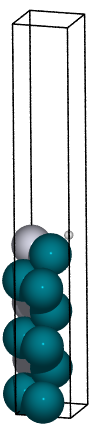

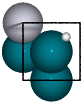

In [21]:
for i in range(len(best_energy)):
    print(bulk_names[i])
    print(f"H_ads energy : {best_energy[i]} eV")
    visual(best_CONTCAR[i])
    visual(best_CONTCAR[i], (1,1,1), '0x, 0y, 0z')

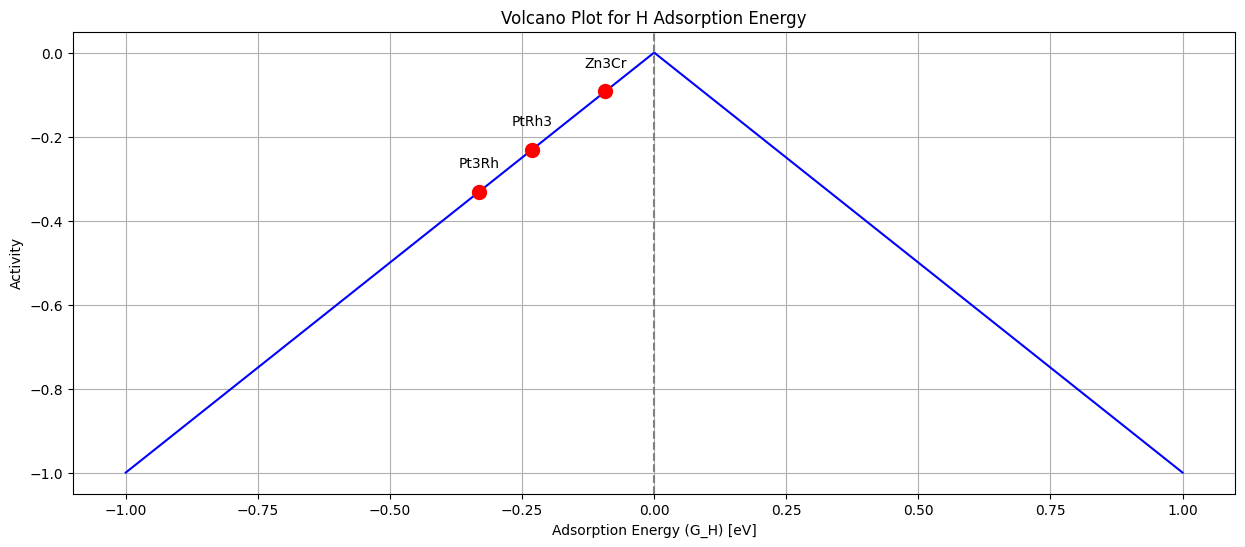

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the optimal value for the volcano plot
optimal_G_H = 0

# Generate x-values for the two lines
x_left = np.arange(-1, optimal_G_H + 0.01, 0.01)
y_left = x_left - optimal_G_H

x_right = np.arange(optimal_G_H, 1.01, 0.01)
y_right = optimal_G_H - x_right

# Plot the volcano lines
plt.figure(figsize=(15, 6))
plt.plot(x_left, y_left, linestyle='-', color='blue')
plt.plot(x_right, y_right, linestyle='-', color='blue')

# Mark the optimal point
plt.axvline(x=optimal_G_H, color='gray', linestyle='--', label=f'Optimal G_H = {optimal_G_H} eV')

# Scatter the adsorption energies
for i in range(len(best_energy)):
    plt.scatter(best_energy[i], -abs( optimal_G_H - best_energy[i]), color='red', s = 100, zorder=20)
    plt.text(best_energy[i], -abs(optimal_G_H - best_energy[i]) + 0.05,
             bulk_names[i],
             fontsize=10,
             color='black',
             ha='center',
             va='bottom',
             zorder=25)

# Plot labels and title
plt.xlabel('Adsorption Energy (G_H) [eV]')
plt.ylabel('Activity')
plt.title('Volcano Plot for H Adsorption Energy')
plt.grid(True)

plt.show()